In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa_exvivo = pd.read_csv(IPA_dir + 'IPA_Macrophages_exvivo.csv', sep = ',')
ipa_exvivo.columns = ['Ingenuity Canonical Pathways','exvivo_minus_log_p_val','exvivo_z_score']
ipa_exvivo = ipa_exvivo[-ipa_exvivo['exvivo_z_score'].isin(['#NUM!'])]
ipa_exvivo['exvivo_z_score'] = ipa_exvivo['exvivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_exvivo

,Ingenuity Canonical Pathways,exvivo_minus_log_p_val,exvivo_z_score
0,EIF2 Signaling,10.30,-4.323
3,Kinetochore Metaphase Signaling Pathway,7.63,-3.087
4,Cell Cycle Control of Chromosomal Replication,7.54,-4.491
5,Th1 Pathway,6.94,0.354
9,Regulation of eIF4 and p70S6K Signaling,6.34,-1.732
...,...,...,...
637,Systemic Lupus Erythematosus In T Cell Signali...,0.00,-0.316
638,Systemic Lupus Erythematosus In B Cell Signali...,0.00,1.155
639,White Adipose Tissue Browning Pathway,0.00,-2.309
640,Necroptosis Signaling Pathway,0.00,-1.000


In [5]:
## read in vivo regulons
ipa_invivo = pd.read_csv(IPA_dir + 'IPA_Macrophages_invivo.csv', sep = ',')
ipa_invivo.columns = ['Ingenuity Canonical Pathways','invivo_minus_log_p_val','invivo_z_score']
ipa_invivo = ipa_invivo[-ipa_invivo['invivo_z_score'].isin(['#NUM!'])]
ipa_invivo['invivo_z_score'] = ipa_invivo['invivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_invivo

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score
0,Sirtuin Signaling Pathway,5.00,-0.408
1,Cholecystokinin/Gastrin-mediated Signaling,4.48,-2.683
2,Leukocyte Extravasation Signaling,4.12,-0.816
3,ATM Signaling,4.10,0.832
4,Actin Cytoskeleton Signaling,4.09,-1.461
...,...,...,...
575,Systemic Lupus Erythematosus In T Cell Signali...,0.00,-2.556
576,Systemic Lupus Erythematosus In B Cell Signali...,0.00,-1.732
577,Regulation Of The Epithelial Mesenchymal Trans...,0.00,-1.000
578,Kinetochore Metaphase Signaling Pathway,0.00,0.000


In [6]:
ipa = pd.merge(ipa_invivo, ipa_exvivo, on='Ingenuity Canonical Pathways')
ipa

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,Sirtuin Signaling Pathway,5.00,-0.408,4.320,-0.590
1,Cholecystokinin/Gastrin-mediated Signaling,4.48,-2.683,1.770,0.626
2,Leukocyte Extravasation Signaling,4.12,-0.816,2.540,1.414
3,ATM Signaling,4.10,0.832,3.580,-1.091
4,Actin Cytoskeleton Signaling,4.09,-1.461,1.840,-2.191
...,...,...,...,...,...
308,Systemic Lupus Erythematosus In T Cell Signali...,0.00,-2.556,0.000,-0.316
309,Systemic Lupus Erythematosus In B Cell Signali...,0.00,-1.732,0.000,1.155
310,Regulation Of The Epithelial Mesenchymal Trans...,0.00,-1.000,0.479,1.732
311,Kinetochore Metaphase Signaling Pathway,0.00,0.000,7.630,-3.087


In [8]:
ipa_diverging_2 = ipa[(ipa['invivo_z_score'] > +0.5) & (ipa['exvivo_z_score'] < -0.5)]
ipa_diverging_2.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
3,ATM Signaling,4.100,0.832,3.580,-1.091
9,Oxidative Phosphorylation,3.450,2.828,0.580,-2.668
34,RHOGDI Signaling,2.360,1.789,0.777,-0.894
73,Coronavirus Replication Pathway,1.560,2.646,1.240,-1.897
142,Gluconeogenesis I,1.050,1.000,0.359,-2.000
146,Necroptosis Signaling Pathway,1.010,1.291,0.000,-1.000
236,ID1 Signaling Pathway,0.461,0.775,2.510,-1.897
266,Dilated Cardiomyopathy Signaling Pathway,0.000,1.342,0.000,-0.905
268,SNARE Signaling Pathway,0.000,1.000,0.000,-1.604


In [9]:
ipa_diverging_1 = ipa[(ipa['invivo_z_score'] < -1) & (ipa['exvivo_z_score'] > +1)]
ipa_diverging_1.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
99,HER-2 Signaling in Breast Cancer,1.330,-1.414,4.020,1.043
102,MSP-RON Signaling In Macrophages Pathway,1.290,-1.508,4.470,1.095
127,Estrogen Biosynthesis,1.130,-1.342,0.660,1.134
140,HMGB1 Signaling,1.060,-1.155,1.850,1.400
185,Role of PKR in Interferon Induction and Antivi...,0.721,-1.265,1.370,2.132
233,GP6 Signaling Pathway,0.479,-1.890,0.693,2.065
294,TEC Kinase Signaling,0.000,-1.291,0.000,1.400
309,Systemic Lupus Erythematosus In B Cell Signali...,0.000,-1.732,0.000,1.155


In [13]:
pathways = ['ATM Signaling','RHOGDI Signaling','Necroptosis Signaling Pathway','ID1 Signaling Pathway',
            'Dilated Cardiomyopathy Signaling Pathway','SNARE Signaling Pathway',
            'HER-2 Signaling in Breast Cancer','MSP-RON Signaling In Macrophages Pathway','HMGB1 Signaling',
            'GP6 Signaling Pathway','TEC Kinase Signaling','Role of PKR in Interferon Induction and Antiviral Response'
           ]

In [14]:
ipa = ipa[ipa['Ingenuity Canonical Pathways'].isin(pathways)]

In [15]:
diverging_invivo = ipa[['Ingenuity Canonical Pathways','invivo_z_score']]
diverging_invivo = diverging_invivo.sort_values(by = 'invivo_z_score', ascending = False)
diverging_invivo.rename(columns = {'invivo_z_score':'z-score'}, inplace = True)
diverging_invivo['condition'] = 'invivo'
diverging_exvivo = ipa[['Ingenuity Canonical Pathways','exvivo_z_score']]
diverging_exvivo.rename(columns = {'exvivo_z_score':'z-score'}, inplace = True)
diverging_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_2189877/1890095800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverging_exvivo['condition'] = 'exvivo'


In [16]:
diverging_induced = pd.concat([diverging_invivo, diverging_exvivo], axis=0)

In [17]:
diverging_induced

,Ingenuity Canonical Pathways,z-score,condition
34,RHOGDI Signaling,1.789,invivo
266,Dilated Cardiomyopathy Signaling Pathway,1.342,invivo
146,Necroptosis Signaling Pathway,1.291,invivo
268,SNARE Signaling Pathway,1.000,invivo
3,ATM Signaling,0.832,invivo
236,ID1 Signaling Pathway,0.775,invivo
140,HMGB1 Signaling,-1.155,invivo
185,Role of PKR in Interferon Induction and Antivi...,-1.265,invivo
294,TEC Kinase Signaling,-1.291,invivo
99,HER-2 Signaling in Breast Cancer,-1.414,invivo


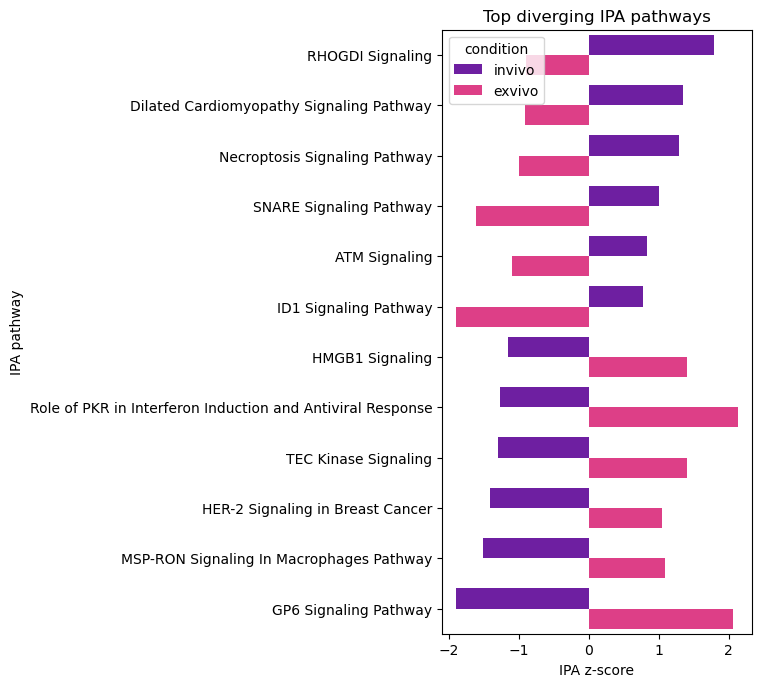

In [18]:
sb.barplot(data = diverging_induced,
           x = 'z-score',
           y = 'Ingenuity Canonical Pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top diverging IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                #xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_Macrophages_IPA_diverging_pathways.pdf')
plt.show()